# Palmer Penguins Modeling

Import the Palmer Penguins dataset and print out the first few rows.

Suppose we want to predict `bill_depth_mm` using the other variables in the dataset.

Which variables would we need to **dummify**?

In [49]:
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from palmerpenguins import load_penguins
from sklearn.preprocessing import PolynomialFeatures
import plotnine as pt

In [67]:
# Code Here
penguins = load_penguins()
penguins = pd.get_dummies(penguins,columns=["sex",'island','species'])
penguins = penguins.dropna()
penguins.head()



,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year,sex_female,sex_male,island_Biscoe,island_Dream,island_Torgersen,species_Adelie,species_Chinstrap,species_Gentoo
0,39.1,18.7,181.0,3750.0,2007,False,True,False,False,True,True,False,False
1,39.5,17.4,186.0,3800.0,2007,True,False,False,False,True,True,False,False
2,40.3,18.0,195.0,3250.0,2007,True,False,False,False,True,True,False,False
4,36.7,19.3,193.0,3450.0,2007,True,False,False,False,True,True,False,False
5,39.3,20.6,190.0,3650.0,2007,False,True,False,False,True,True,False,False


I dummified all of the variables with string inputs. This turned sex, island, and species into new variables with True and False values. One of these variables from each categories is redundant and doesn't need to be used.

Let's use `bill_length_mm` to predict `bill_depth_mm`. Prepare your data and fit the following models on the entire dataset:

* Simple linear regression (e.g. straight-line) model
* Quadratic (degree 2 polynomial) model
* Cubic (degree 3 polynomial) model
* Degree 10 polynomial model

Make predictions for each model and plot your fitted models on the scatterplot.

In [61]:
X = penguins[['bill_length_mm']]
y = penguins['bill_depth_mm']

# Linear Model
linear = Pipeline([
    ('linear_regression', LinearRegression())
])
linear.fit(X, y)
y_pred_linear = linear.predict(X)

# Quadratic Model
quadratic = Pipeline([
    ('polynomial_features', PolynomialFeatures(degree=2, include_bias=False)),
    ('linear_regression', LinearRegression())
])

quadratic.fit(X, y)
y_pred_quadratic = quadratic.predict(X)


# Cubic Model
cubic = Pipeline([
    ('polynomial_features', PolynomialFeatures(degree=3, include_bias=False)),
    ('linear_regression', LinearRegression())
])

cubic.fit(X, y)
y_pred_cubic = cubic.predict(X)


# Degree 10 Model
deg10 = Pipeline([
    ('polynomial_features', PolynomialFeatures(degree=10, include_bias=False)),
    ('linear_regression', LinearRegression())
])

deg10.fit(X, y)
y_pred_deg10 = deg10.predict(X)

In [62]:
# Combining into the dataset
penguins['Linear'] = y_pred_linear
penguins['Quadratic'] = y_pred_quadratic
penguins['Cubic'] = y_pred_cubic
penguins['Degree 10'] = y_pred_deg10

penguins_long = pd.melt(penguins, id_vars=['bill_length_mm', 'bill_depth_mm'],value_vars= ['Linear', 'Quadratic','Cubic', 'Degree 10'],var_name='Model', value_name='Prediction')
penguins_long

,bill_length_mm,bill_depth_mm,Model,Prediction
0,39.1,18.7,Linear,17.561136
1,39.5,17.4,Linear,17.527128
2,40.3,18.0,Linear,17.459111
3,36.7,19.3,Linear,17.765187
4,39.3,20.6,Linear,17.544132
...,...,...,...,...
1363,55.8,19.8,Degree 10,17.994293
1364,43.5,18.1,Degree 10,16.597141
1365,49.6,18.2,Degree 10,16.558232
1366,50.8,19.0,Degree 10,17.423519


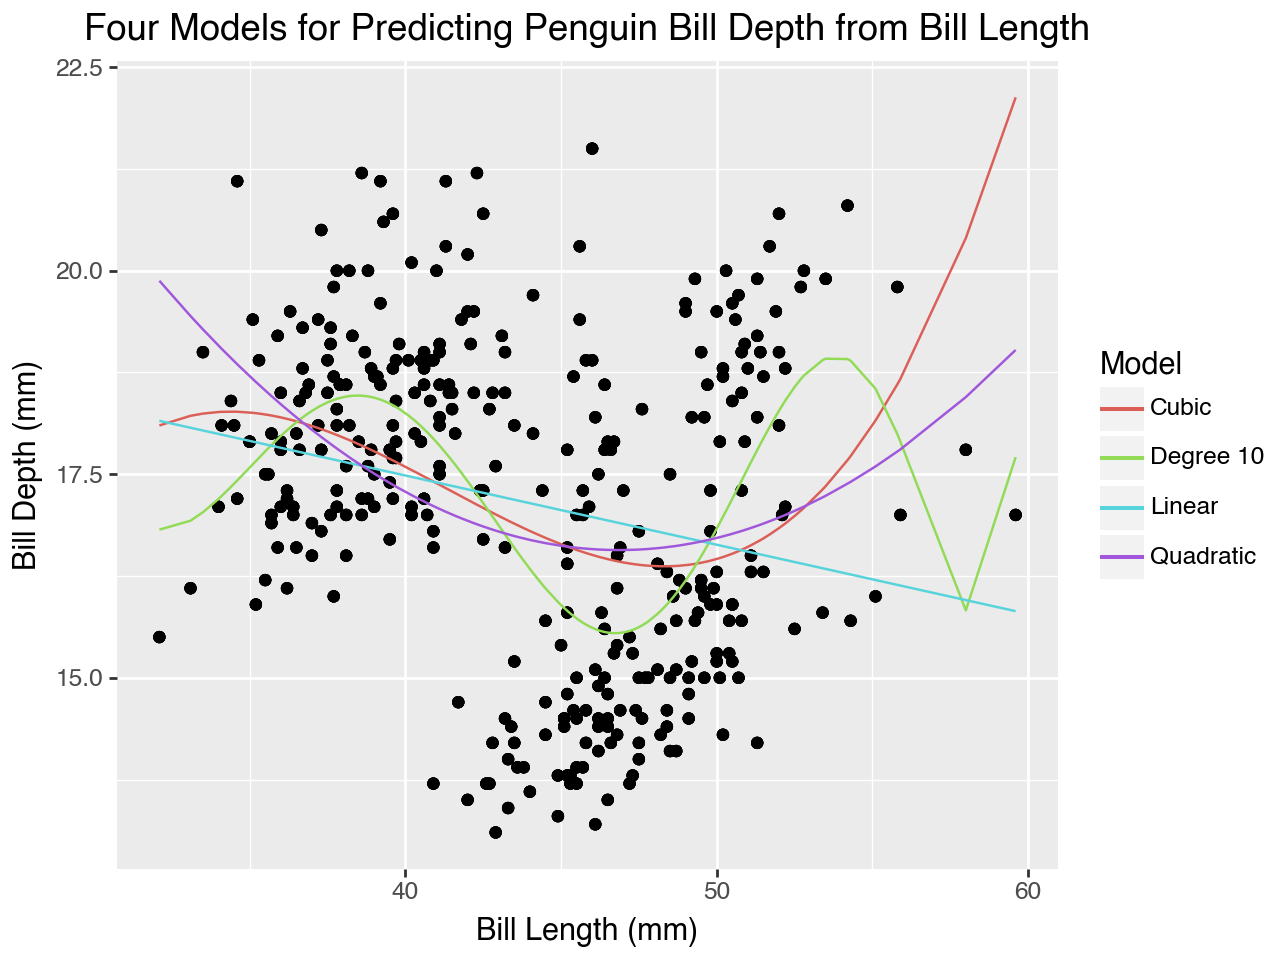

In [64]:
# Visualization
(pt.ggplot(penguins_long, pt.aes(x='bill_length_mm'))
 + pt.geom_point(pt.aes(y = 'bill_depth_mm'))
 + pt.geom_line(pt.aes(y = 'Prediction', color = 'Model'))
 + pt.labs(title='Four Models for Predicting Penguin Bill Depth from Bill Length',
           x = "Bill Length (mm)",
           y = 'Bill Depth (mm)')
 )
 


The linear date is definitely underfitting the data because it is not picking up the changing shape of the data very well. The data does not appear to be linear.
The degree 10 model seems to be overfitting because it is changing the model for every little change. I would expect it to perform poorly on test data.
The quadratic and cubic models both seem to fit the data fairly well. I think the cubic model is the best because it is changing with the data best and picking up some of the unique changes that the quadratic model cannot. The data also seems to start low which is picked up by the cubic model, so the data best follows a cubic shape.

* Are any of the models above underfitting the data? If so, which ones and how can you tell?
* Are any of thhe models above overfitting the data? If so, which ones and how can you tell?
* Which of the above models do you think fits the data best and why?

https://realpython.com/linear-regression-in-python/
This website helped show me how to do a linear regression.
https://www.thesecuritybuddy.com/python-scikit-learn/how-to-use-pipeline-for-polynomial-regression-in-sklearn/2/
Helped with quadratic regression.
https://data36.com/polynomial-regression-python-scikit-learn/
Another useful website to help with pipeline code for polynomials.

I consulted Chat GPT-4o to figure out how to combine plots as well as the correct syntax for regression inside the Pipeline function.